In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn import metrics

In [2]:
merge_test_im = np.loadtxt('./csv/merge_test_im.csv', delimiter=',')
merge_test_lb = np.loadtxt('./csv/merge_test_lb.csv', delimiter=',')
merge_train_im = np.array(pd.read_csv('./csv/merge_train_im.csv', header=None))
merge_train_lb = np.loadtxt('./csv/merge_train_lb.csv', delimiter=',')

In [3]:
bal_mapa = {
    0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A',
    11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K',
    21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U',
    31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'd', 39: 'e', 40: 'f',
    41: 'g', 42: 'h', 43: 'n', 44: 'q', 45: 'r', 46: 't'
}

class_mapa = {
    0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A',
    11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K',
    21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U',
    31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'c', 39: 'd', 40: 'e',
    41: 'f', 42: 'g', 43: 'h', 44: 'i', 45: 'j', 46: 'k', 47: 'l', 48: 'm', 49: 'n', 50: 'o',
    51: 'p', 52: 'q', 53: 'r', 54: 's', 55: 't', 56: 'u', 57: 'v', 58: 'w', 59: 'x', 60: 'y',
    61: 'z'
}

### Reducción de dimensionalidad / graficar

#### PCA

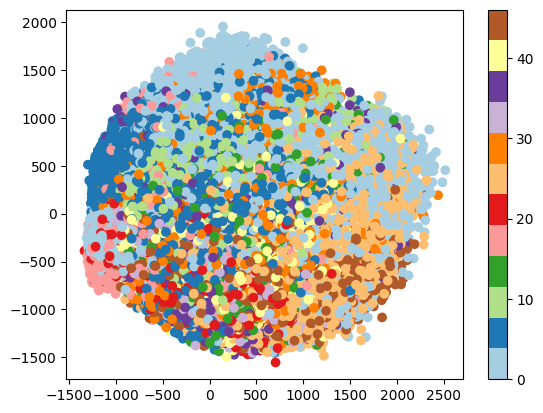

In [4]:
pca = PCA(n_components=2)
proj = pca.fit_transform(np.concatenate((merge_train_im, merge_test_im)))
plt.scatter(proj[:, 0], proj[:, 1], c=np.concatenate((merge_train_lb, merge_test_lb)), cmap="Paired")
plt.colorbar()

#### Sparse random projection

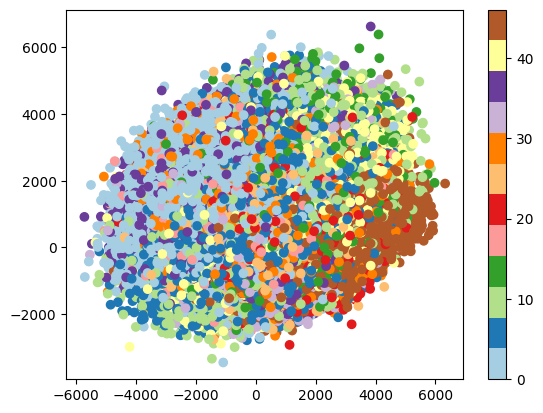

In [5]:
from sklearn import random_projection as rp
from sklearn.cluster import FeatureAgglomeration

plt.figure()

s_ran = rp.SparseRandomProjection(n_components=2)
proj_s_ran = s_ran.fit_transform(np.concatenate((merge_train_im, merge_test_im)))
plt.scatter(proj_s_ran[:, 0], proj_s_ran[:, 1], c=np.concatenate((merge_train_lb, merge_test_lb)), cmap="Paired")
plt.colorbar()

#### Gaussian random projection

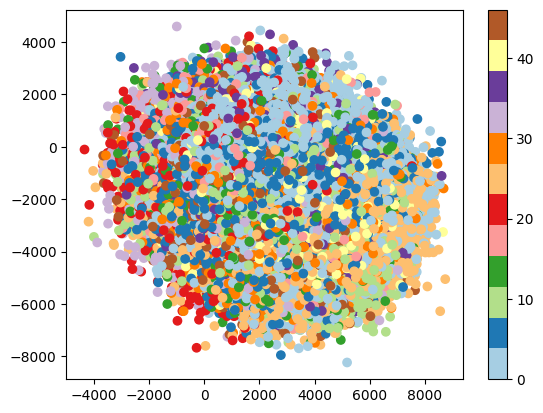

In [6]:
plt.figure()

g_ran = rp.GaussianRandomProjection(n_components=2)
proj_g_ran = g_ran.fit_transform(np.concatenate((merge_train_im, merge_test_im)))
plt.scatter(proj_g_ran[:, 0], proj_g_ran[:, 1], c=np.concatenate((merge_train_lb, merge_test_lb)), cmap="Paired")
plt.colorbar()

#### Feature agglomeration

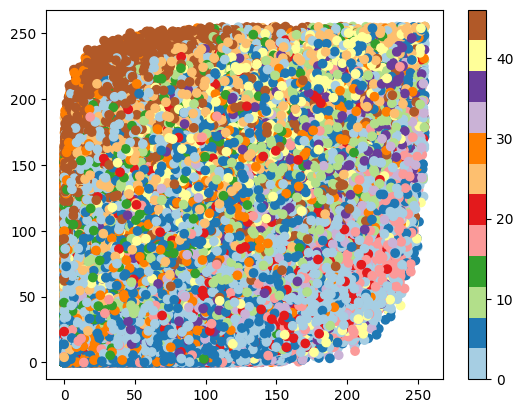

In [7]:
plt.figure()

fa = FeatureAgglomeration(n_clusters=10)
proj_fa = fa.fit_transform(np.concatenate((merge_train_im, merge_test_im)))
plt.scatter(proj_fa[:, 0], proj_fa[:, 1], c=np.concatenate((merge_train_lb, merge_test_lb)), cmap="Paired")
plt.colorbar()

### Clasificar

#### Gaussian Naive Bayes

In [8]:
clf = GaussianNB()
clf.fit(merge_train_im, merge_train_lb)

predicted = clf.predict(merge_test_im)
expected = merge_test_lb

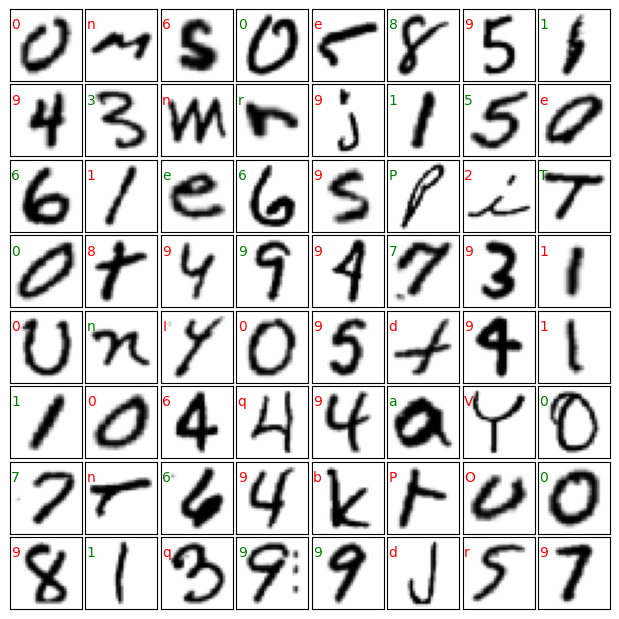

In [9]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)


for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(merge_test_im.reshape(-1, 28, 28)[i], cmap='gray_r')

    # label the image with the target value
    if predicted[i] == expected[i]:
        ax.text(0, 7, bal_mapa[predicted[i]], color='green')
    else:
        ax.text(0, 7, bal_mapa[predicted[i]], color='red')

In [10]:
df_reportNB = pd.DataFrame(metrics.classification_report(expected, predicted, output_dict=True)).transpose()
df_reportNB.index = list(bal_mapa.values()) + ['accuracy', 'macro avg', 'weighted avg']
df_reportNB.to_csv('reportNB_m.csv', index=True)
df_reportNB

,precision,recall,f1-score,support
0,0.513196,0.622802,0.562711,5745.000000
1,0.422692,0.962812,0.587473,6400.000000
2,0.818818,0.223417,0.351049,5765.000000
3,0.777401,0.511241,0.616834,5827.000000
4,0.887006,0.057112,0.107314,5498.000000
5,0.721371,0.335899,0.458365,5326.000000
6,0.518963,0.792120,0.627086,5787.000000
7,0.746055,0.442704,0.555674,5873.000000
8,0.390244,0.381963,0.386059,5655.000000
9,0.243859,0.867811,0.380731,5651.000000


In [11]:
conf_matrixNB = metrics.confusion_matrix(y_true=expected, y_pred=predicted)

df_confNB = pd.DataFrame(conf_matrixNB, index=list(bal_mapa.values()), columns=list(bal_mapa.values()))
df_confNB.to_csv('conf_matrixNB_m.csv', index=True)

#### K-Vecinos cercanos

In [4]:
clf_KN = KNeighborsClassifier(n_neighbors=10)
clf_KN.fit(merge_train_im, merge_train_lb)

predictedKN = clf_KN.predict(merge_test_im)
expectedKN = merge_test_lb

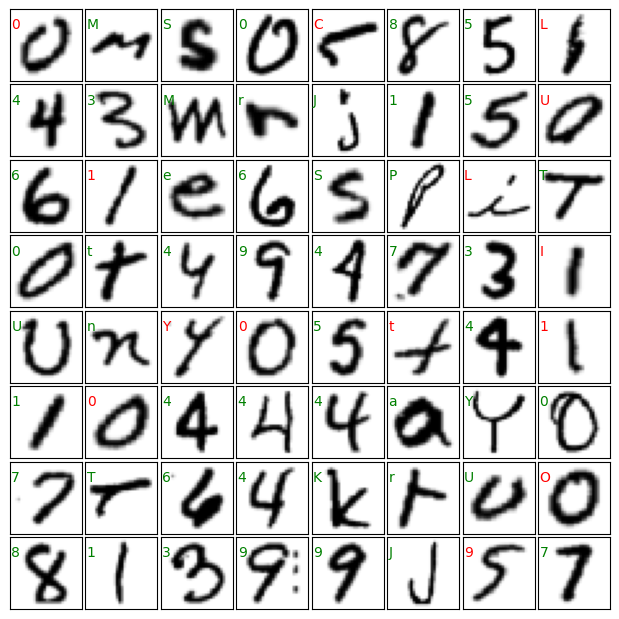

In [5]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)


for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(merge_test_im.reshape(-1, 28, 28)[i], cmap='gray_r')

    # label the image with the target value
    if predictedKN[i] == expectedKN[i]:
        ax.text(0, 7, bal_mapa[predictedKN[i]], color='green')
    else:
        ax.text(0, 7, bal_mapa[predictedKN[i]], color='red')

In [6]:
df_reportKN = pd.DataFrame(metrics.classification_report(expectedKN, predictedKN, output_dict=True)).transpose()
df_reportKN.index = list(bal_mapa.values()) + ['accuracy', 'macro avg', 'weighted avg']
df_reportKN.to_csv('reportKN_m.csv', index=True)
df_reportKN

,precision,recall,f1-score,support
0,0.637763,0.786075,0.704195,5745.000000
1,0.623721,0.895625,0.735343,6400.000000
2,0.913685,0.956635,0.934667,5765.000000
3,0.948344,0.983010,0.965366,5827.000000
4,0.921296,0.941069,0.931078,5498.000000
5,0.910721,0.848479,0.878499,5326.000000
6,0.933532,0.973216,0.952961,5787.000000
7,0.945831,0.981100,0.963142,5873.000000
8,0.941135,0.938638,0.939885,5655.000000
9,0.879075,0.968678,0.921704,5651.000000


In [7]:
conf_matrixKN = metrics.confusion_matrix(y_true=expectedKN, y_pred=predictedKN)

df_confKN = pd.DataFrame(conf_matrixKN, index=list(bal_mapa.values()), columns=list(bal_mapa.values()))
df_confKN.to_csv('conf_matrixKN_m.csv', index=True)

#### Multi-layer perceptron (red neuronal)

In [8]:
clf_NN = MLPClassifier(random_state=1, max_iter=300, learning_rate='invscaling')
clf_NN.fit(merge_train_im, merge_train_lb)

predictedNN = clf_NN.predict(merge_test_im)
expectedNN = merge_test_lb

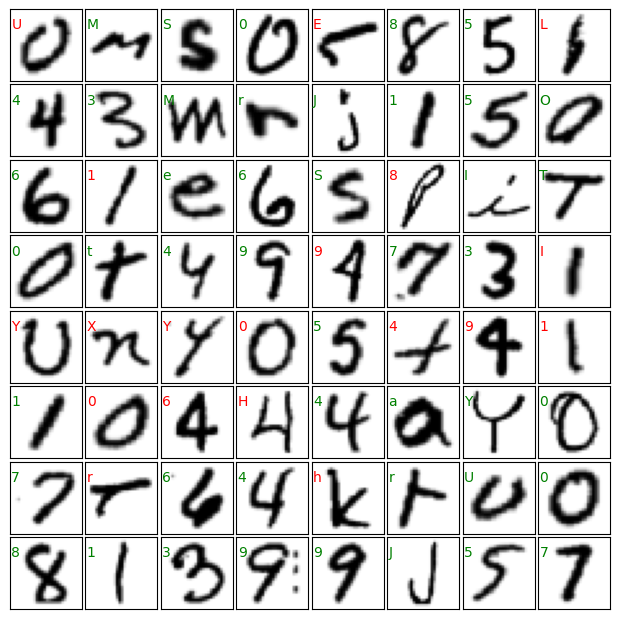

In [12]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)


for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(merge_test_im.reshape(-1, 28, 28)[i], cmap='gray_r')

    # label the image with the target value
    if predictedNN[i] == expectedNN[i]:
        ax.text(0, 7, bal_mapa[predictedNN[i]], color='green')
    else:
        ax.text(0, 7, bal_mapa[predictedNN[i]], color='red')

In [13]:
df_reportNN = pd.DataFrame(metrics.classification_report(expectedNN, predictedNN, output_dict=True)).transpose()
df_reportNN.index = list(bal_mapa.values()) + ['accuracy', 'macro avg', 'weighted avg']
df_reportNN.to_csv('reportNN_m.csv', index=True)
df_reportNN

,precision,recall,f1-score,support
0,0.627898,0.820366,0.711343,5745.000000
1,0.647529,0.860000,0.738792,6400.000000
2,0.887265,0.842324,0.864211,5765.000000
3,0.943826,0.902523,0.922713,5827.000000
4,0.907544,0.785558,0.842157,5498.000000
5,0.815162,0.783327,0.798928,5326.000000
6,0.876490,0.914809,0.895240,5787.000000
7,0.951870,0.936148,0.943944,5873.000000
8,0.810763,0.892485,0.849663,5655.000000
9,0.822548,0.942488,0.878443,5651.000000


In [11]:
conf_matrixNN = metrics.confusion_matrix(y_true=expectedNN, y_pred=predictedNN)

df_confNN = pd.DataFrame(conf_matrixNN, index=list(bal_mapa.values()), columns=list(bal_mapa.values()))
df_confNN.to_csv('conf_matrixNN_m.csv', index=True)

#### Random forest

In [6]:
clf_RF = RandomForestClassifier(criterion='entropy')
clf_RF.fit(merge_train_im, merge_train_lb)

predictedRF = clf_RF.predict(merge_test_im)
expectedRF = merge_test_lb

In [ ]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)


for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(merge_test_im.reshape(-1, 28, 28)[i], cmap='gray_r')

    # label the image with the target value
    if predictedRF[i] == expectedRF[i]:
        ax.text(0, 7, class_mapa[predictedRF[i]], color='green')
    else:
        ax.text(0, 7, class_mapa[predictedRF[i]], color='red')

In [ ]:
df_reportRF = pd.DataFrame(metrics.classification_report(expectedRF, predictedRF, output_dict=True)).transpose()
df_reportRF.index = list(class_mapa.values()) + ['accuracy', 'macro avg', 'weighted avg']
df_reportRF.to_csv('reportRF_m.csv', index=True)
df_reportRF

In [ ]:
conf_matrixRF = metrics.confusion_matrix(y_true=expectedRF, y_pred=predictedRF)

df_confRF = pd.DataFrame(conf_matrixRF, index=list(class_mapa.values()), columns=list(class_mapa.values()))
df_confRF.to_csv('conf_matrixRF_m.csv', index=True)